In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

data = pd.read_csv("C:/apps/hct/datasets/하이닉스 rawdata.csv", encoding="cp949")



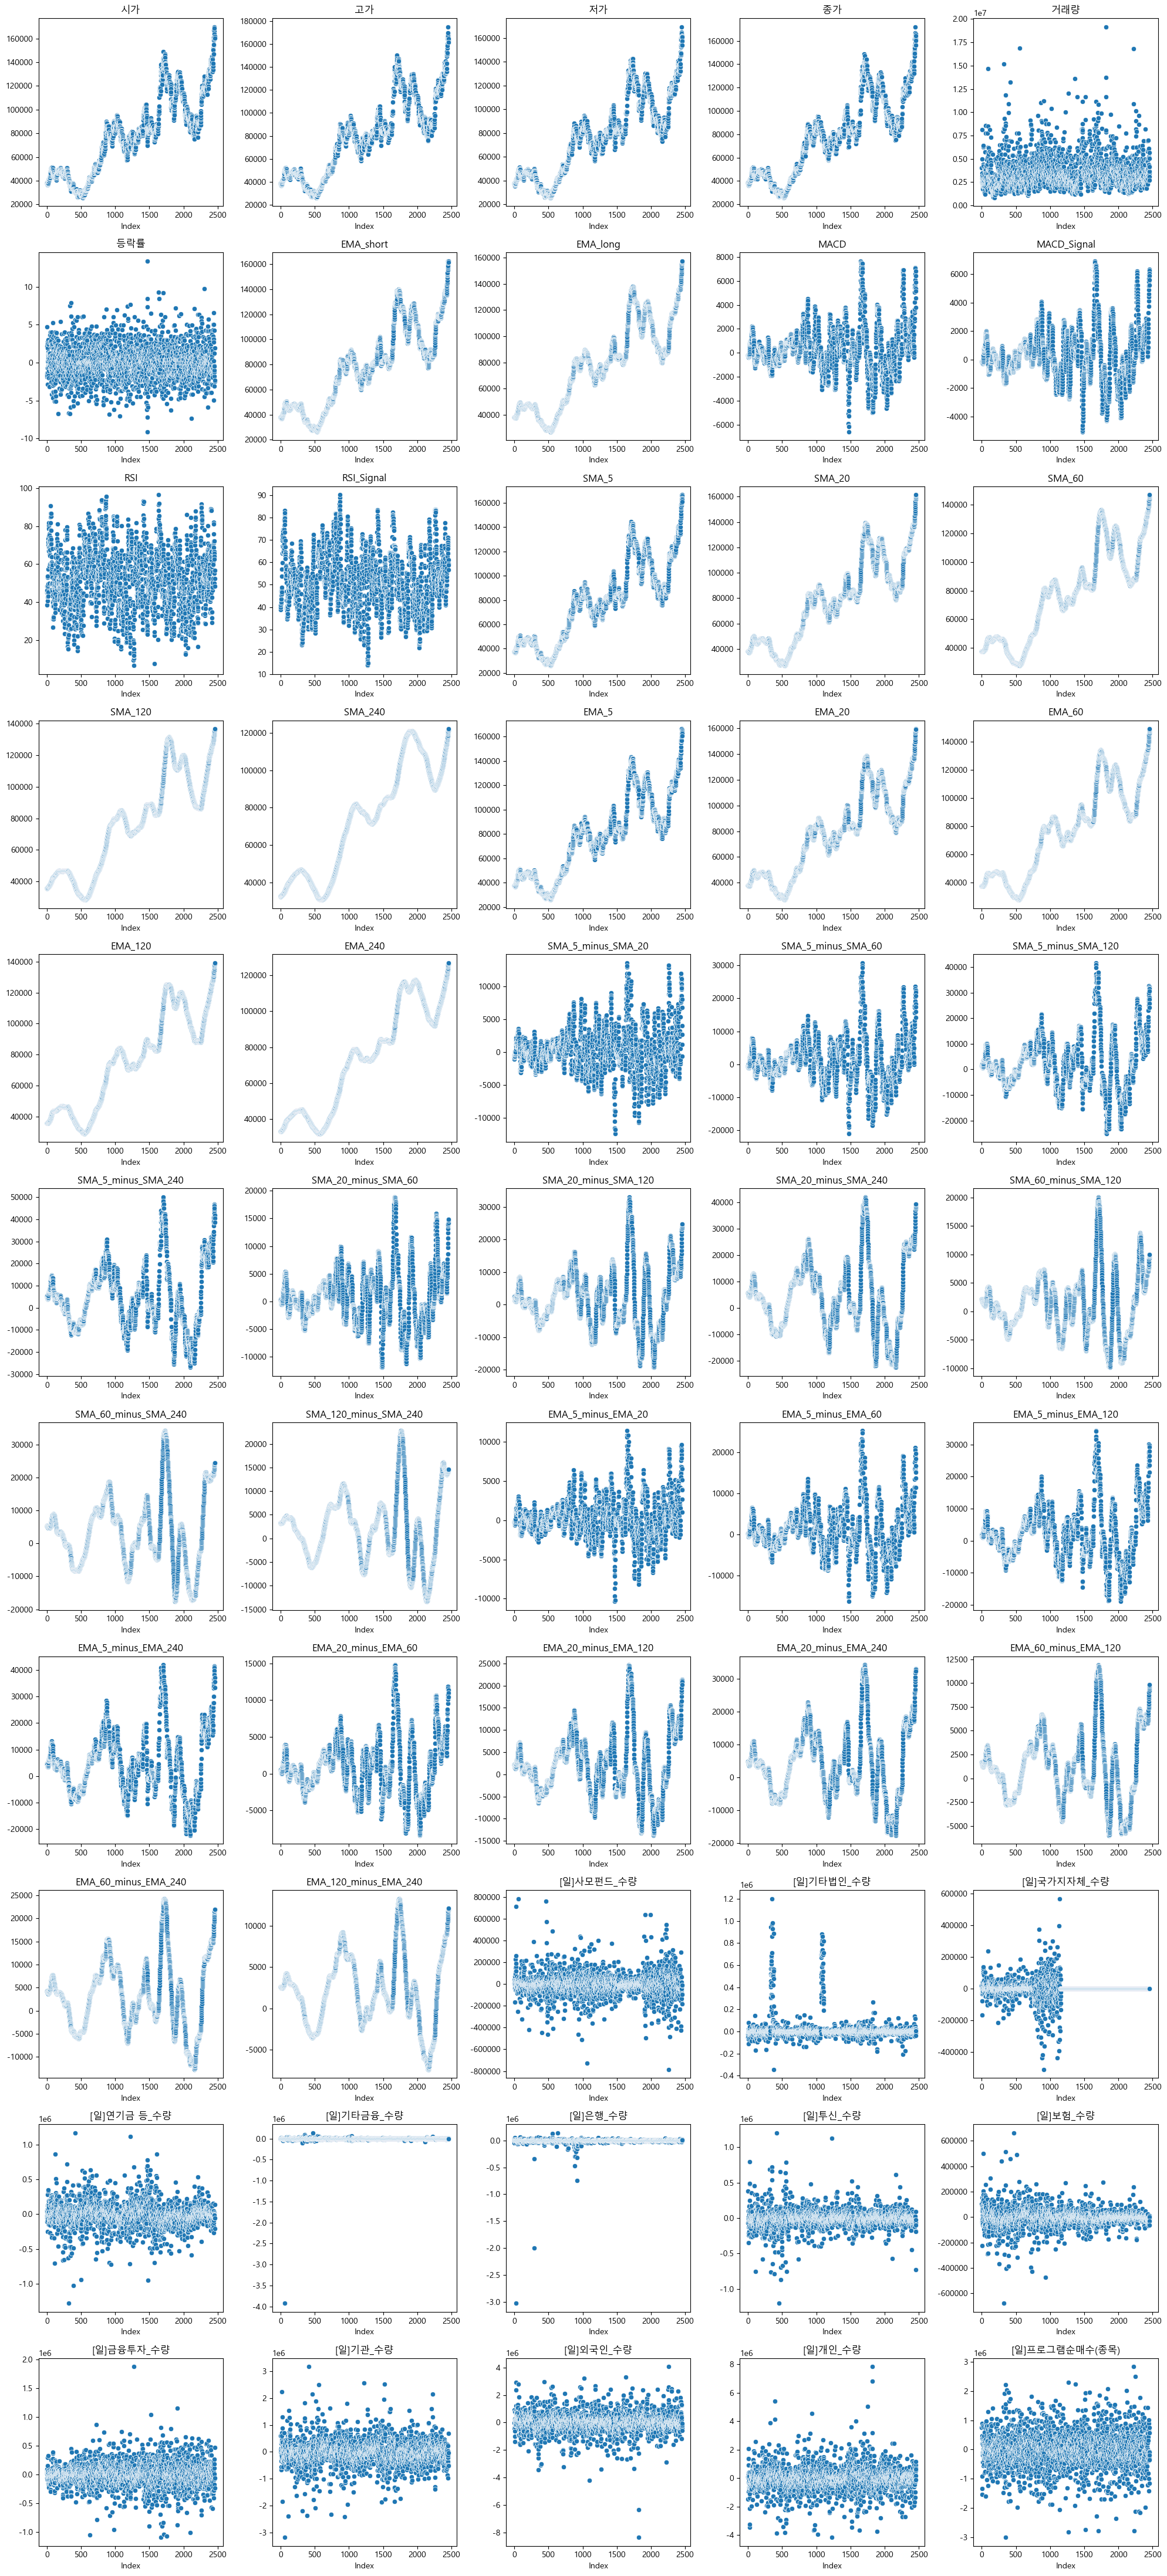

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm

# 사용 가능한 폰트 중에서 한글을 지원하는 폰트 이름 찾기
# 예시로 'NanumGothic'이 있다고 가정합니다. 실제 사용 가능한 폰트로 변경해 주세요.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
warnings.filterwarnings('ignore')
# 데이터프레임의 컬럼 수에 따라 동적으로 행과 열의 수를 조정할 수 있습니다.
# 여기서는 11행 5열로 설정
rows = 11
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 44)) # 전체 그래프의 크기 조절

# 각 컬럼에 대해 산점도를 그림
col_index = 1  # 'a' 컬럼부터 시작
for i in range(rows):
    for j in range(cols):
        if col_index < len(data.columns):
            sns.scatterplot(ax=axs[i, j], x=data.index, y=data[data.columns[col_index]])
            axs[i, j].set_title(data.columns[col_index])
            axs[i, j].set_xlabel('Index')
            axs[i, j].set_ylabel('')
        else:
            axs[i, j].axis('off')  # 사용하지 않는 서브플롯은 숨김
        col_index += 1

plt.tight_layout()  # 서브플롯 간 간격 조정
# plt.show()  # 그래프 표시

In [20]:
# from matplotlib import font_manager

# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# print([font_manager.FontProperties(fname=font).get_name() for font in font_list])

['Segoe Script', 'Segoe UI', 'Segoe Print', 'Segoe UI', 'Corbel', 'Gabriola', 'Sitka', 'Microsoft YaHei', 'LG Smart UI', 'Sylfaen', 'HCR Batang', 'Batang', 'HCR Dotum', 'Cambria', 'Myanmar Text', 'Calibri', 'Courier New', 'Han Santteut Dotum', 'Malgun Gothic', 'Han Santteut Dotum', 'Consolas', 'Hancom Gothic', 'Verdana', 'Microsoft PhagsPa', 'Yu Gothic', 'Tahoma', 'NewJumja', 'Microsoft Tai Le', 'Segoe MDL2 Assets', 'Segoe UI', 'Yu Gothic', 'Segoe UI', 'Malgun Gothic', 'Georgia', 'HoloLens MDL2 Assets', 'Cambria', 'Courier New', 'LG Smart UI', 'Comic Sans MS', 'Verdana', 'Franklin Gothic Medium', 'Symbol', 'Segoe UI Emoji', 'Sitka', 'MS Gothic', 'Segoe UI', 'HCR Dotum Ext', 'Yu Gothic', 'Trebuchet MS', 'Segoe UI', 'Bahnschrift', 'Calibri', 'Times New Roman', 'Cambria', 'Trebuchet MS', 'Verdana', 'HyhwpEQ', 'Comic Sans MS', 'Calibri', 'Leelawadee UI', 'Arial', 'Lucida Console', 'Segoe UI', 'Georgia', 'Verdana', 'Haan Wing2', 'Constantia', 'Arial', 'Candara', 'Corbel', 'Corbel', 'SimSun'

In [23]:
# 컬럼 목록 재정의
robust_cols = [
    '시가', '고가', '저가', '종가', '[일]사모펀드_수량', '[일]기타법인_수량',
    '[일]국가지자체_수량', '[일]연기금 등_수량', '[일]기타금융_수량', '[일]은행_수량',
    '[일]투신_수량', '[일]보험_수량', '[일]금융투자_수량', '[일]기관_수량', 
    '[일]외국인_수량', '[일]개인_수량', '[일]프로그램순매수(종목)'
]
standard_cols = [
    '등락률', 'EMA_short', 'EMA_long', 'MACD', 'MACD_Signal', 'RSI',
    'RSI_Signal', 'SMA_5', 'SMA_20', 'SMA_60', 'SMA_120', 'SMA_240',
    'EMA_5', 'EMA_20', 'EMA_60', 'EMA_120', 'EMA_240',
    'SMA_5_minus_SMA_20', 'SMA_5_minus_SMA_60', 'SMA_5_minus_SMA_120',
    'SMA_5_minus_SMA_240', 'SMA_20_minus_SMA_60', 'SMA_20_minus_SMA_120',
    'SMA_20_minus_SMA_240', 'SMA_60_minus_SMA_120', 'SMA_60_minus_SMA_240',
    'SMA_120_minus_SMA_240', 'EMA_5_minus_EMA_20', 'EMA_5_minus_EMA_60',
    'EMA_5_minus_EMA_120', 'EMA_5_minus_EMA_240', 'EMA_20_minus_EMA_60',
    'EMA_20_minus_EMA_120', 'EMA_20_minus_EMA_240', 'EMA_60_minus_EMA_120',
    'EMA_60_minus_EMA_240', 'EMA_120_minus_EMA_240'
]
log_cols = ['거래량']

# 쉼표가 있는 모든 숫자 문자열을 실수로 변환
for col in robust_cols + log_cols:
    if data[col].dtype == object:
        data[col] = data[col].str.replace(',', '').astype(float)

robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
# 스케일링 적용
# 로버스트 스케일링
for col in robust_cols:
    data[col] = robust_scaler.fit_transform(data[[col]].values)

# 표준화
for col in standard_cols:
    data[col] = standard_scaler.fit_transform(data[[col]].values)

# 로그 변환
for col in log_cols:
    data[col] = np.log1p(data[col].values)

csv_file_path = "C:/apps/hct/datasets/하이닉스 scaling.csv"  # 저장할 파일 경로 및 이름 설정
data.to_csv(csv_file_path, index=True)
# 변환된 데이터의 일부 확인
data.head()

날짜        시가        고가        저가        종가        거래량       등락률  \
0  2014-03-21 -0.851149 -0.834894 -0.835520 -0.821074  15.208712  2.075296   
1  2014-03-24 -0.824176 -0.833908 -0.823411 -0.832008  14.884212 -0.671306   
2  2014-03-25 -0.834166 -0.843765 -0.833502 -0.842942  14.725485 -0.680446   
3  2014-03-26 -0.837163 -0.841794 -0.830474 -0.827038  14.739945  0.911733   
4  2014-03-27 -0.838162 -0.841794 -0.832492 -0.840954  14.747617 -0.850505   

   EMA_short  EMA_long      MACD  ...  [일]연기금 등_수량  [일]기타금융_수량  [일]은행_수량  \
0  -1.267659 -1.263866 -0.300861  ...    -0.118498    0.307563  4.527523   
1  -1.265633 -1.263455 -0.274031  ...     0.238107    0.000000 -1.894648   
2  -1.266594 -1.264378 -0.274841  ...    -0.280247    0.682231 -6.599847   
3  -1.263516 -1.263337 -0.240902  ...    -0.098220    0.000000 -0.015291   
4  -1.264316 -1.264032 -0.242786  ...     0.373194   -0.528450  3.006881   

   [일]투신_수량  [일]보험_수량  [일]금융투자_수량  [일]기관_수량  [일]외국인_수량  [일]개인_수량  \
0  3.981942  2.029861    0.183384  1.331608   1.374596 -1.928576   
1 -0.586656 -0.748527    0.346853  0.043044  -0.079842  0.107574   
2  1.069135 -0.588008    0.388900  0.176883  -0.702910  0.484881   
3  0.290529  1.743246    0.036680  0.237142   0.252018 -0.352650   
4 -0.458782 -0.578367    0.407798  0.176055  -1.613751  1.214745   

   [일]프로그램순매수(종목)  
0        1.100531  
1       -1.931517  
2        0.324422  
3        1.313001  
4       -2.218120  

[5 rows x 56 columns]

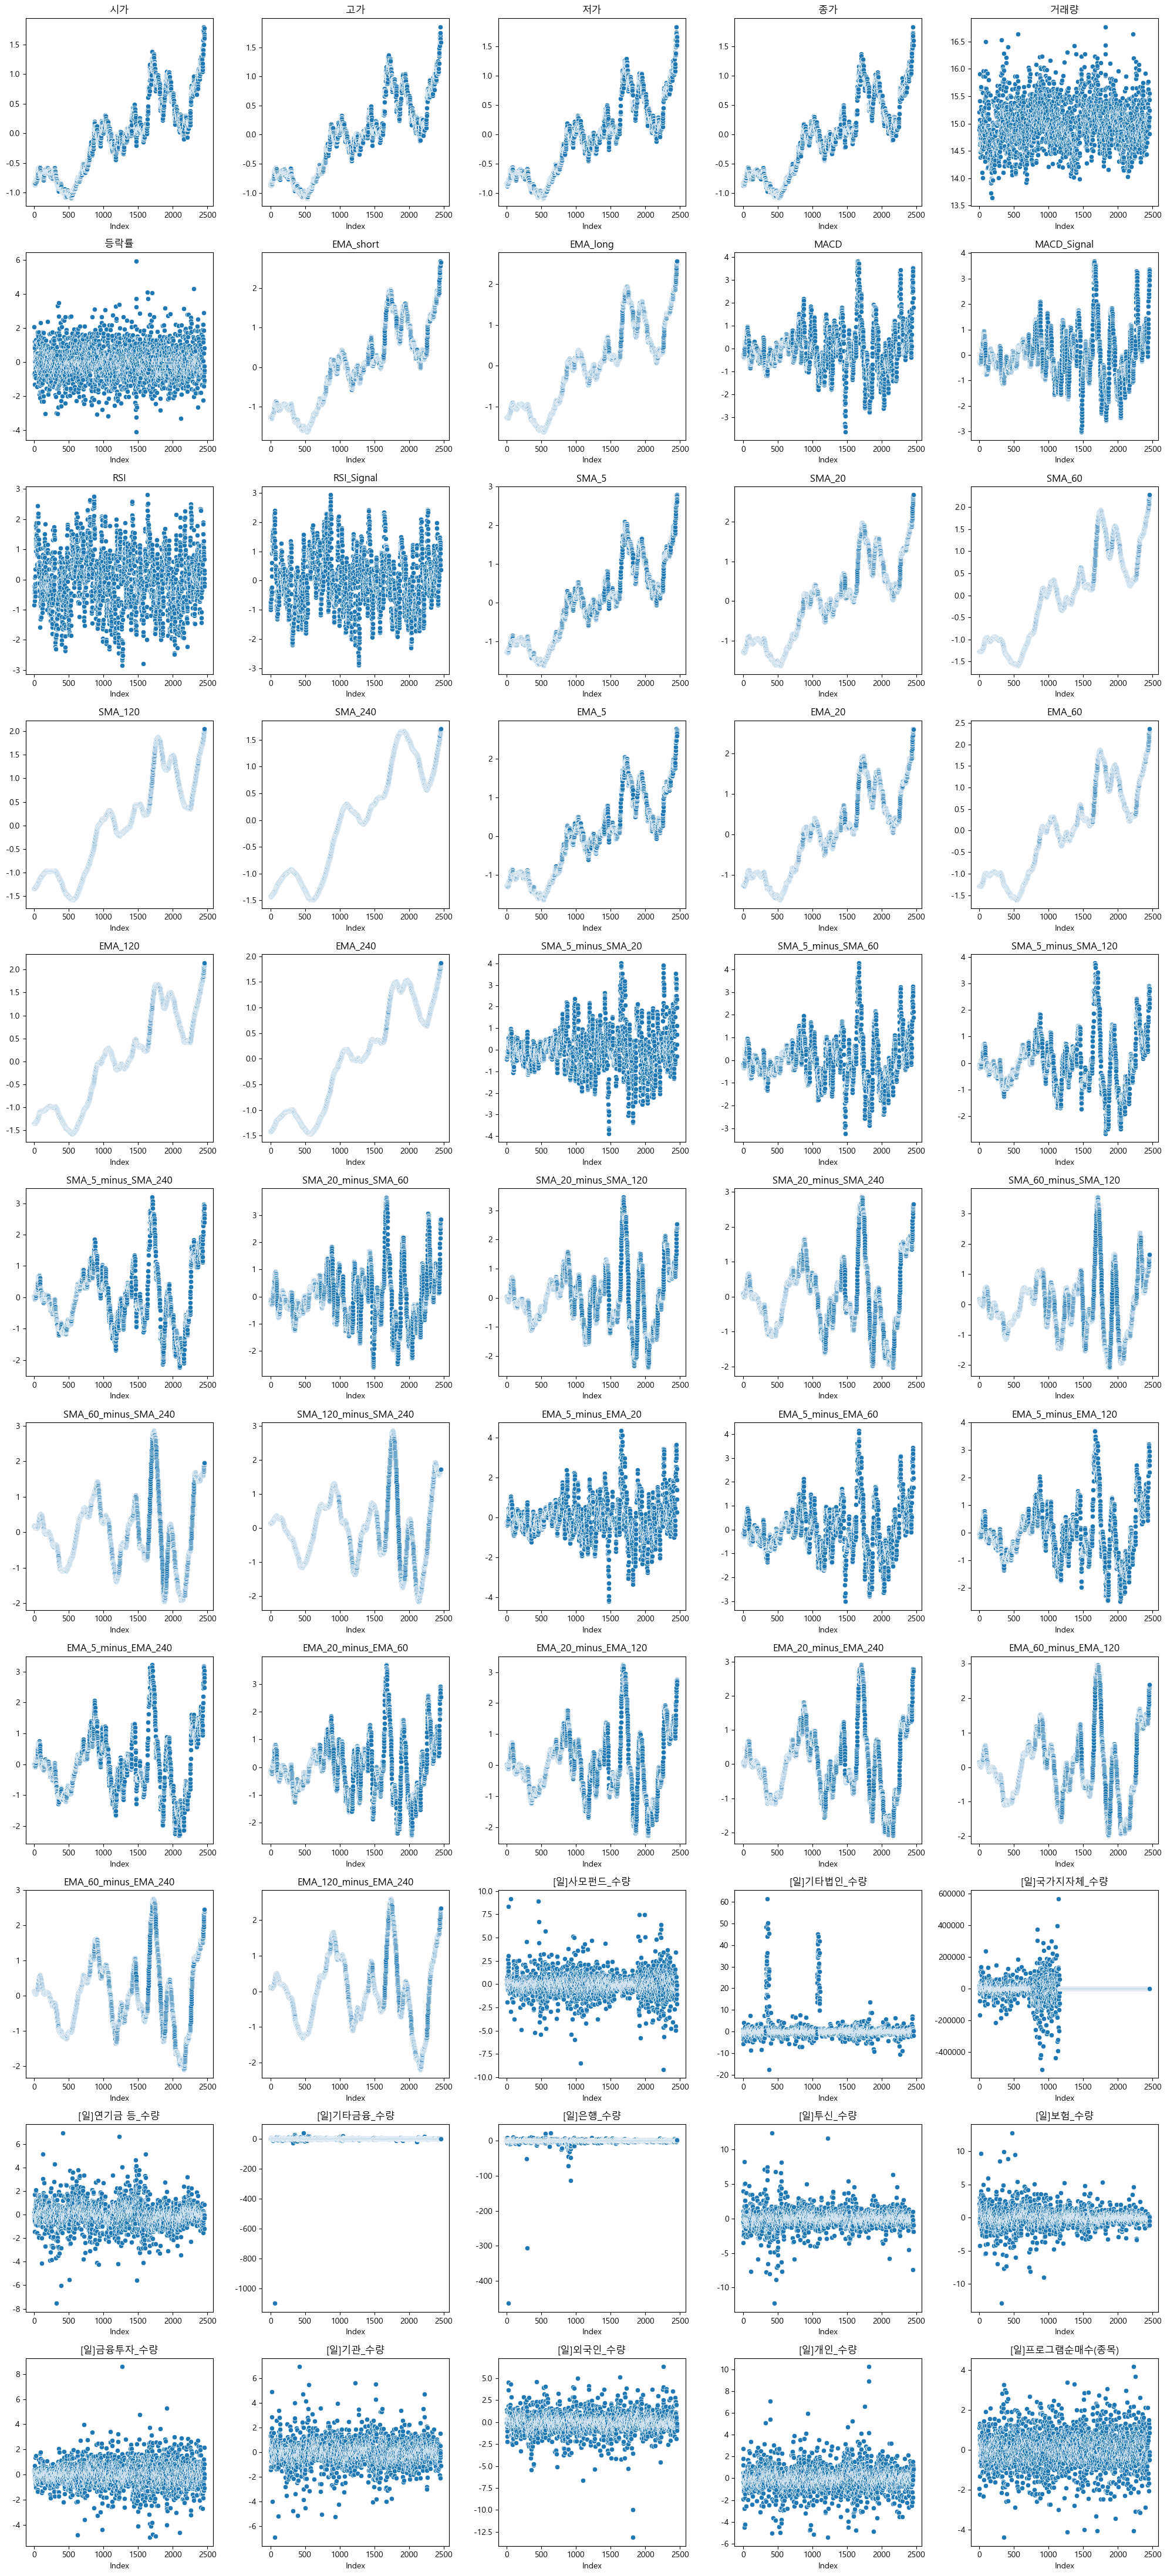

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm

# 사용 가능한 폰트 중에서 한글을 지원하는 폰트 이름 찾기
# 예시로 'NanumGothic'이 있다고 가정합니다. 실제 사용 가능한 폰트로 변경해 주세요.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 
warnings.filterwarnings('ignore')
# 데이터프레임의 컬럼 수에 따라 동적으로 행과 열의 수를 조정할 수 있습니다.
# 여기서는 11행 5열로 설정
rows = 11
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 44)) # 전체 그래프의 크기 조절

# 각 컬럼에 대해 산점도를 그림
col_index = 1  # 'a' 컬럼부터 시작
for i in range(rows):
    for j in range(cols):
        if col_index < len(data.columns):
            sns.scatterplot(ax=axs[i, j], x=data.index, y=data[data.columns[col_index]])
            axs[i, j].set_title(data.columns[col_index])
            axs[i, j].set_xlabel('Index')
            axs[i, j].set_ylabel('')
        else:
            axs[i, j].axis('off')  # 사용하지 않는 서브플롯은 숨김
        col_index += 1

plt.tight_layout()  # 서브플롯 간 간격 조정
# plt.show()  # 그래프 표시